# DMA Course Project
* Team Id: C_15
* Sem: 5
* Division: C
* Department: CSE
## Project ID: 5DMACP07
## Project Title: STOCK RETURN PREDICITON
* **Problem Statement**: The aim of this challenge is to predict the return of a stock in the US market using historical data over a recent period of 20 days.
 For a given day, RET is 1 if the return outperforms the median of all returns this day.
### Team Members:
* Pooja Majali   01FE18BCS143 Leader
* Nidhi Singh    01FE18BCS131 
* Priya Majali   01FE18BCS158
* Nikhil Hasabi  01FE18BCS134

## Walkthrough of the dataset

* **Goal:** Predict the return of a stock market,based on the previous 20 days data.


* **Training data:** set of companies with their stock,sectore,industry ,return and volumes of 20days.


* **Build a model:** to accurately predict the sign of RETURN of stock.


* **Test data:** set of companies without the Return value.

## Understanding the dataset

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold


* To load the x_train and the y_train csv files.
* Here, x_train.csv contains all the comapnies with sector,industry,sub-industry and RETURN and VOLUME for 20 days.
* Each company has it unique id.
* The y_train.csv contains the sign of RETURN for each company.

### Read x_train and y_train

In [7]:
x_train = pd.read_csv('x_train.csv', index_col='ID')
y_train = pd.read_csv('y_train.csv', index_col='ID')
train = pd.concat([x_train, y_train], axis=1)
test = pd.read_csv('x_test.csv', index_col='ID')


In [9]:
#To print the first 5 tupples 
x_train.head()

,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,VOLUME_2,...,RET_16,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20
ID,,,,,,,,,,,,,,,,,,,,,
0,0,2,18,5,3,44,-0.015748,0.147931,-0.015504,0.179183,...,0.059459,0.630899,0.003254,-0.379412,0.008752,-0.110597,-0.012959,0.174521,-0.002155,-0.000937
1,0,3,43,15,6,104,0.003984,NaN,-0.090580,NaN,...,0.015413,NaN,0.003774,NaN,-0.018518,NaN,-0.028777,NaN,-0.034722,NaN
2,0,4,57,20,8,142,0.000440,-0.096282,-0.058896,0.084771,...,0.008964,-0.010336,-0.017612,-0.354333,-0.006562,-0.519391,-0.012101,-0.356157,-0.006867,-0.308868
3,0,8,1,1,1,2,0.031298,-0.429540,0.007756,-0.089919,...,-0.031769,0.012105,0.033824,-0.290178,-0.001468,-0.663834,-0.013520,-0.562126,-0.036745,-0.631458
4,0,14,36,12,5,92,0.027273,-0.847155,-0.039302,-0.943033,...,-0.038461,-0.277083,-0.012659,0.139086,0.004237,-0.017547,0.004256,0.579510,-0.040817,0.802806


In [10]:
y_train.head()

,RET
ID,
0,True
1,True
2,False
3,False
4,False


### Combining the label of the training dataset with the daset itself

In [12]:
x_train['RET']=y_train['RET']
#To print the first 5 tupples 
x_train.head()

,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,VOLUME_2,...,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20,RET
ID,,,,,,,,,,,,,,,,,,,,,
0,0,2,18,5,3,44,-0.015748,0.147931,-0.015504,0.179183,...,0.630899,0.003254,-0.379412,0.008752,-0.110597,-0.012959,0.174521,-0.002155,-0.000937,True
1,0,3,43,15,6,104,0.003984,NaN,-0.090580,NaN,...,NaN,0.003774,NaN,-0.018518,NaN,-0.028777,NaN,-0.034722,NaN,True
2,0,4,57,20,8,142,0.000440,-0.096282,-0.058896,0.084771,...,-0.010336,-0.017612,-0.354333,-0.006562,-0.519391,-0.012101,-0.356157,-0.006867,-0.308868,False
3,0,8,1,1,1,2,0.031298,-0.429540,0.007756,-0.089919,...,0.012105,0.033824,-0.290178,-0.001468,-0.663834,-0.013520,-0.562126,-0.036745,-0.631458,False
4,0,14,36,12,5,92,0.027273,-0.847155,-0.039302,-0.943033,...,-0.277083,-0.012659,0.139086,0.004237,-0.017547,0.004256,0.579510,-0.040817,0.802806,False


 **x.describe()**
 It is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. When this method is applied to a series of string, it returns a different output which is shown in the examples below. Return type: Statistical summary of data frame

In [13]:
# To observe the statistical features of our training dataset
x_train.describe()

,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,VOLUME_2,...,RET_16,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20
count,418595.000000,418595.000000,418595.000000,418595.000000,418595.000000,418595.000000,416236.000000,353570.000000,416130.000000,352209.000000,...,413315.000000,351333.000000,413294.000000,356281.000000,413288.000000,351009.000000,413282.000000,351266.000000,413254.000000,350738.000000
mean,108.659002,3373.567833,37.176020,12.697959,5.483845,90.391663,0.001383,-0.071502,0.000973,-0.075230,...,0.001074,-0.076018,0.001642,-0.087854,0.001131,-0.076147,-0.000798,-0.076496,-0.000027,-0.076337
std,61.891642,1533.157749,19.706505,7.231701,2.410113,47.491157,0.031311,3.038658,0.030987,2.635549,...,0.029538,2.185741,0.031914,2.094459,0.031435,2.423121,0.030738,2.229668,0.033347,2.721355
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.845324,-2.434414,-0.770751,-3.007262,...,-0.765478,-5.600056,-0.825014,-4.610393,-0.876157,-4.167784,-0.880000,-2.341887,-0.785714,-2.768928
25%,56.000000,2478.000000,22.000000,6.000000,4.000000,49.000000,-0.010970,-0.555394,-0.011312,-0.540629,...,-0.010527,-0.533574,-0.011331,-0.552613,-0.010949,-0.539491,-0.012139,-0.527846,-0.011682,-0.542790
50%,104.000000,3560.000000,43.000000,15.000000,6.000000,104.000000,0.000637,-0.282609,0.000401,-0.278437,...,0.000530,-0.272271,0.000433,-0.285480,0.000000,-0.281753,0.000000,-0.277674,0.000000,-0.283405
75%,161.000000,4606.000000,53.000000,19.000000,7.000000,128.000000,0.012950,0.047759,0.012326,0.041177,...,0.012084,0.029131,0.012862,0.027272,0.012180,0.027639,0.011236,0.030201,0.011712,0.035795
max,223.000000,5716.000000,74.000000,26.000000,11.000000,182.000000,1.444990,1232.174009,1.427746,632.268279,...,1.028902,355.613431,1.707736,408.771698,6.000004,788.461460,2.954430,631.249564,7.208859,932.939205


## EXPLORATORY DATA ANALYSIS

In [14]:
# categorical data dataframe

x=pd.read_csv('x_train.csv',index_col='ID')
categorical=['INDUSTRY', 'INDUSTRY_GROUP', 'SECTOR', 'SUB_INDUSTRY']
cat_df=pd.DataFrame()

for i in categorical:
    cat_df[i]=x[i]


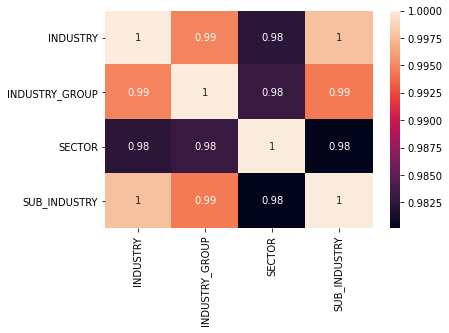

In [15]:
# data visualization

sns.heatmap(cat_df.corr(),annot=True)

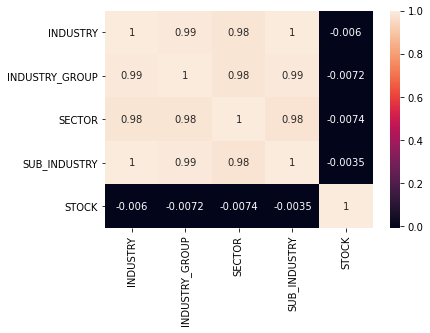

In [16]:
cat_df['STOCK']=x['STOCK']
sns.heatmap(cat_df.corr(),annot=True)


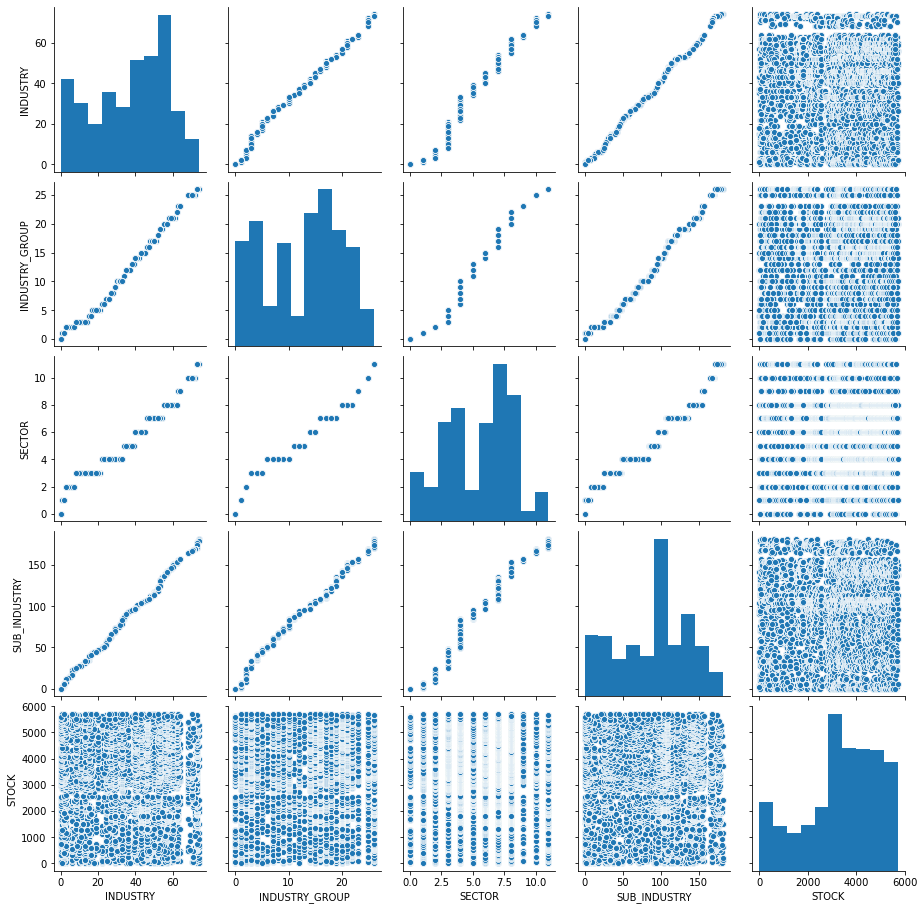

In [17]:
sns.pairplot(cat_df)

In [18]:
df=pd.DataFrame()
list=['RET_1', 'VOLUME_1', 'RET_2', 'VOLUME_2']
for i in list:
    df[i]=x[i]


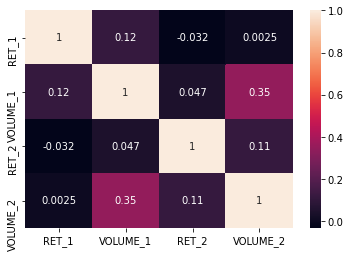

In [19]:
sns.heatmap(df.corr(),annot=True)

In [20]:
dfs=pd.DataFrame()
list=['RET_1',  'RET_2','RET_3','STOCK']
for i in list:
    dfs[i]=x[i]

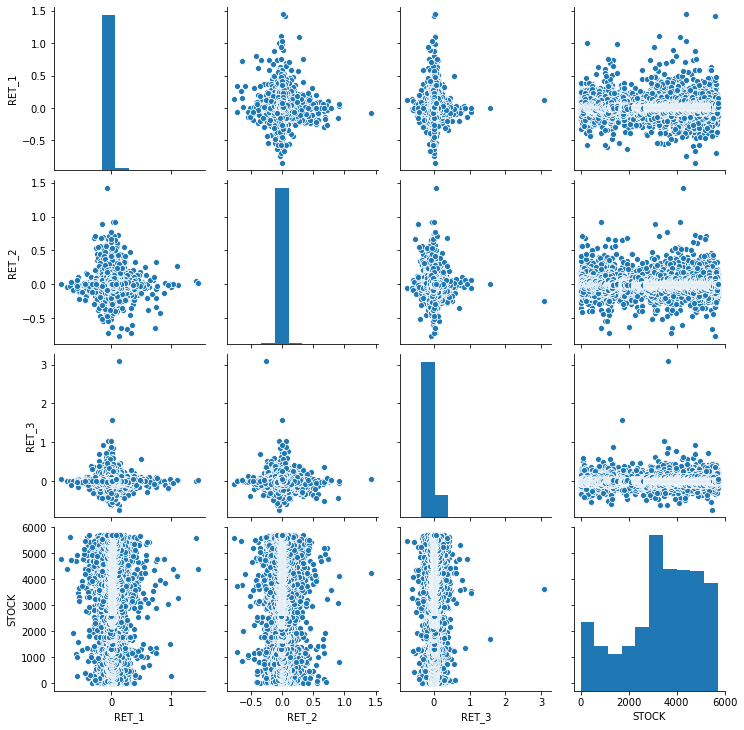

In [21]:
sns.pairplot(dfs)

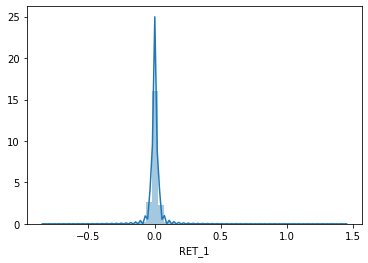

In [22]:
sns.distplot(x['RET_1'])

### Unique number of stocks, sectors, dates, industry etc 

In [23]:
# UNIQUE:
# To observe how many unique values are there for each attribute 
n=x.nunique()

# DATE                 155
# STOCK               5343
# INDUSTRY              72
# INDUSTRY_GROUP        26
# SECTOR                12
# SUB_INDUSTRY         175


# Data preprocessing

### CHECKING AND HANDLING NULL VALUES IN THE DATASET

In [24]:
# DATE, STOCK, INDUSTRY, INDUSTRY_GROUP, SECTOR, SUB_INDUSTRY are all categorical data. they can be used for grouping data
#To check the percentage of NULL values of each attribute

null=(x.isnull().sum()/x.shape[0])*100
print(null)

DATE               0.000000
STOCK              0.000000
INDUSTRY           0.000000
INDUSTRY_GROUP     0.000000
SECTOR             0.000000
SUB_INDUSTRY       0.000000
RET_1              0.563552
VOLUME_1          15.534108
RET_2              0.588875
VOLUME_2          15.859243
RET_3              0.598908
VOLUME_3          16.201579
RET_4              0.607747
VOLUME_4          16.960785
RET_5              0.617303
VOLUME_5          17.843739
RET_6              0.620409
VOLUME_6          17.848756
RET_7              0.617542
VOLUME_7          17.643068
RET_8              0.626620
VOLUME_8          17.653818
RET_9              0.640715
VOLUME_9          17.510481
RET_10             0.643104
VOLUME_10         17.512154
RET_11             0.707366
VOLUME_11         17.206369
RET_12             0.761118
VOLUME_12         14.936394
RET_13             0.802685
VOLUME_13         14.096681
RET_14             1.054241
VOLUME_14         14.555597
RET_15             1.192083
VOLUME_15         15

**msno.matrix** is the nullity matrix .
* It is a data-dense display which lets us quickly visually pick out patterns in data completion.
* Using this matrix, we can observe how is the pattern of null values occurring in our dataset for each attribute.

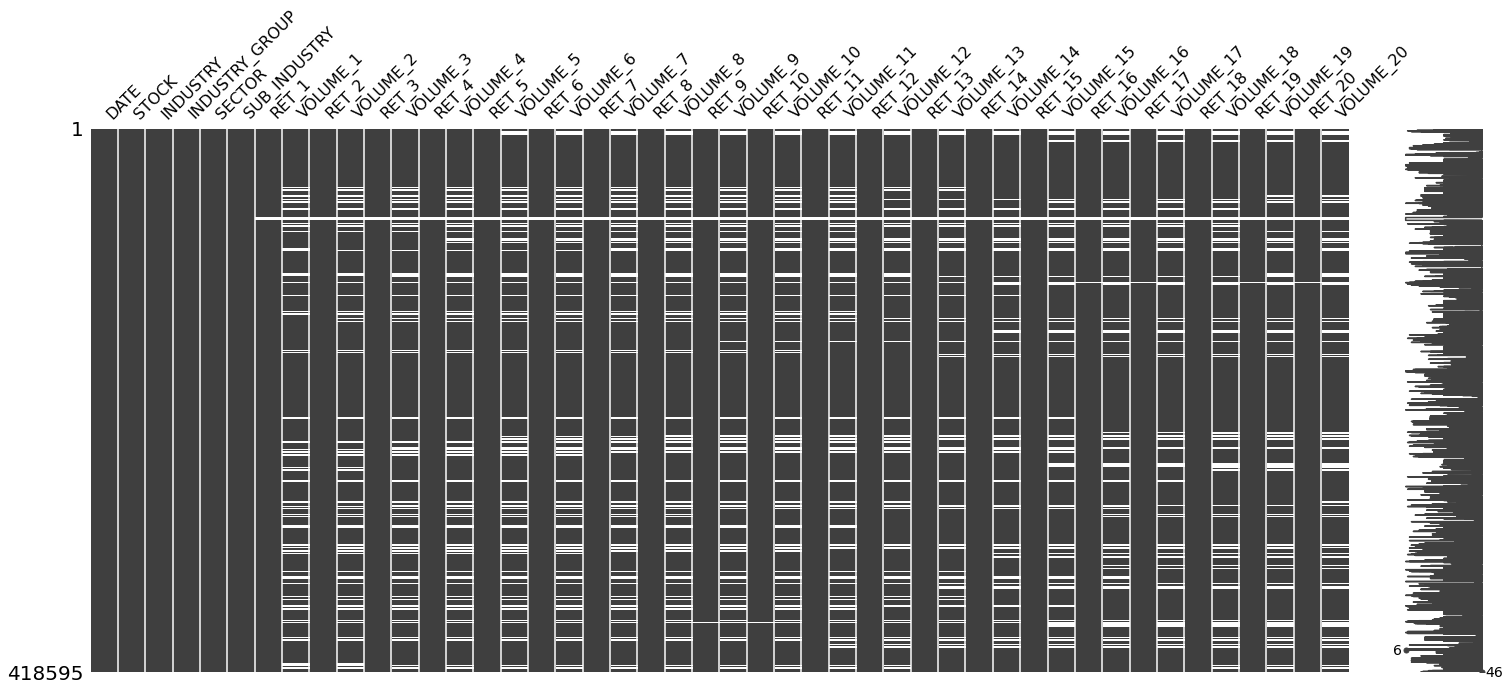

In [25]:
# GRAPHICAL REPRESENTATION
msno.matrix(x) 

* By observing this graph, it is clearly visible that the id, date, stock, industry, industry-group.sector and sub-industry are completely filled i.e they do not have NUll values.
* The RET values of each day is almost filled i.e only few attribute values (0-2%)are missing.
* However, The VOLUME of each day has most of the NULL values.

### Dropping the tupples which have all the values as NULL
Here, we drop all the tupples whose all attribute values are NULL.

In [26]:
print('NUMBER OF TUPLES BEFORE DROPPING: ',x.shape[0])

#Drop all the tupples whose all attribute values are NULL
x.dropna(how='all',thresh=27,inplace=True)

# After dropping print the shape again to observe the number of tuples
print('NUMBER OF TUPLES BEFORE DROPPING: ',x.shape[0])

NUMBER OF TUPLES BEFORE DROPPING:  418595
NUMBER OF TUPLES BEFORE DROPPING:  405828


* WE CAN SEE THAT AROUND 4000 TUPPLES HAVE ALL OR ALMOST ALL NULL VALUES IN THE TUPPLE.

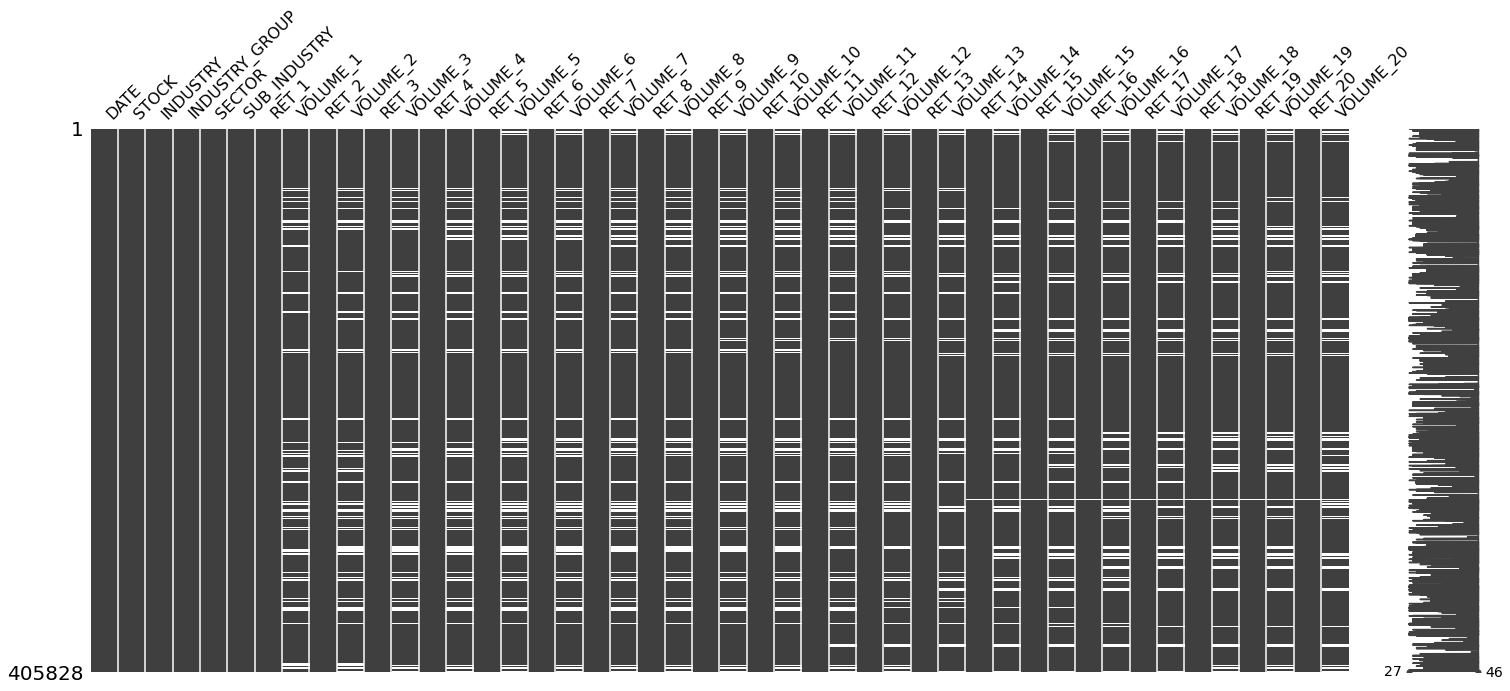

In [27]:
msno.matrix(x) 





### AS RETURNS HAVE 0-2% OF NULL VALUES, WE FILL IT WITH THE MEAN VALUE OF EACH DAY.

In [28]:
list=['RET_%d' % (i + 1) for i in range(20)]

mean=np.zeros(20)

for i in range(20):
    mean[i]=np.mean(x[list[i]])
print(mean)
for i in range(20):
    x[list[i]].replace(np.nan,mean[i],inplace=True)


[ 0.00142802  0.00106466  0.0021265  -0.00079273  0.00033468 -0.0003429
  0.00036266  0.00014753 -0.00067936  0.00011512 -0.0007651   0.00050654
  0.00119565  0.00254403  0.00184558  0.00099469  0.00154898  0.0010454
 -0.0009384  -0.00010858]


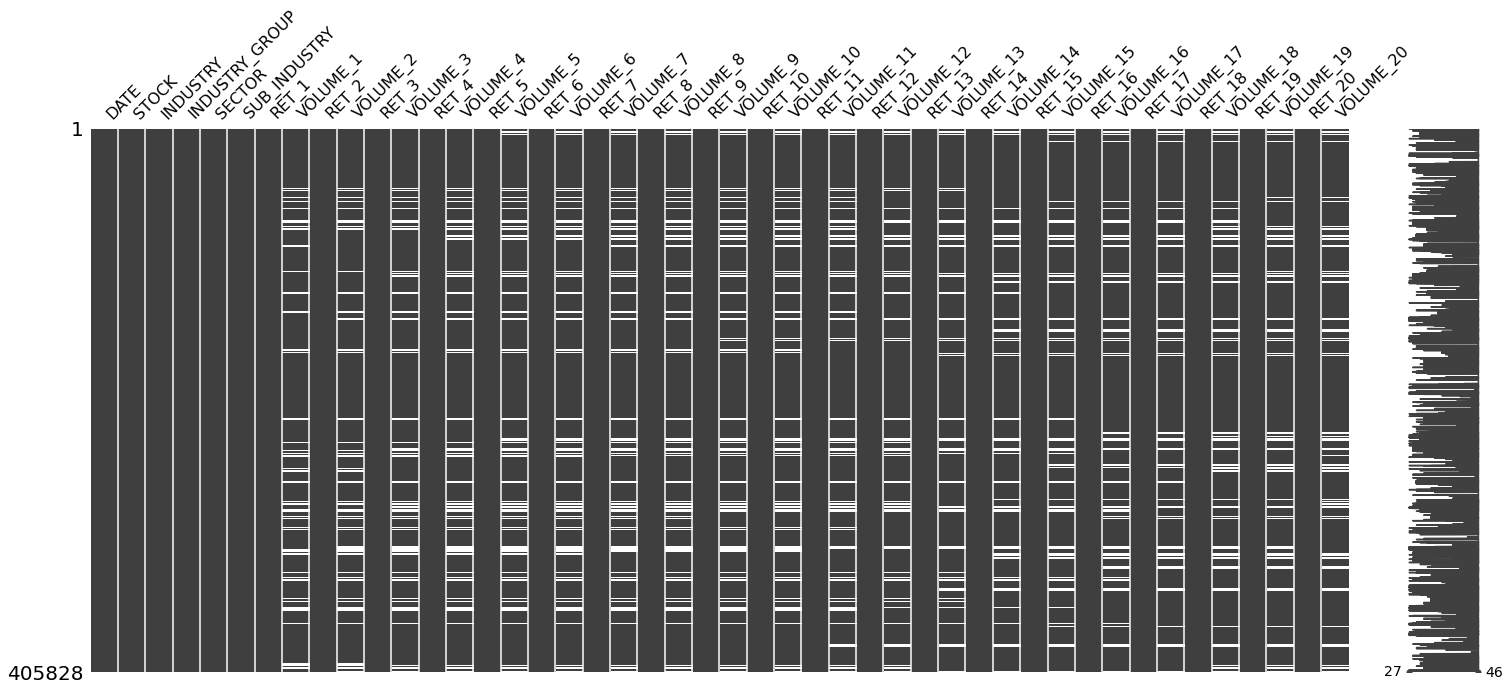

In [29]:
msno.matrix(x) 

* WE CAN SEE THAT THE RETURN VALUES ARE ALL FILLED.

###  To fill the NULL values of VOLUME attribute based on the average of previous days median volumes. (METHOD 1)

In [30]:
vol_col= ['VOLUME_%d' % (i + 1) for i in range(20)]
med=np.zeros(20)

sum=0

for i in range(20):
    sum+=x[vol_col[i]].median()
    med[i]=sum/(i+1)
    
print(med)

for i in range(20):
    x[vol_col[i]].replace(np.nan,med[i],inplace=True)

[-0.28259848 -0.2805216  -0.27978132 -0.27870299 -0.27921403 -0.28070035
 -0.28128124 -0.28234031 -0.28410194 -0.28526863 -0.28580728 -0.28626872
 -0.28672706 -0.28717709 -0.28683486 -0.28592464 -0.28589826 -0.28566747
 -0.28524645 -0.28515433]


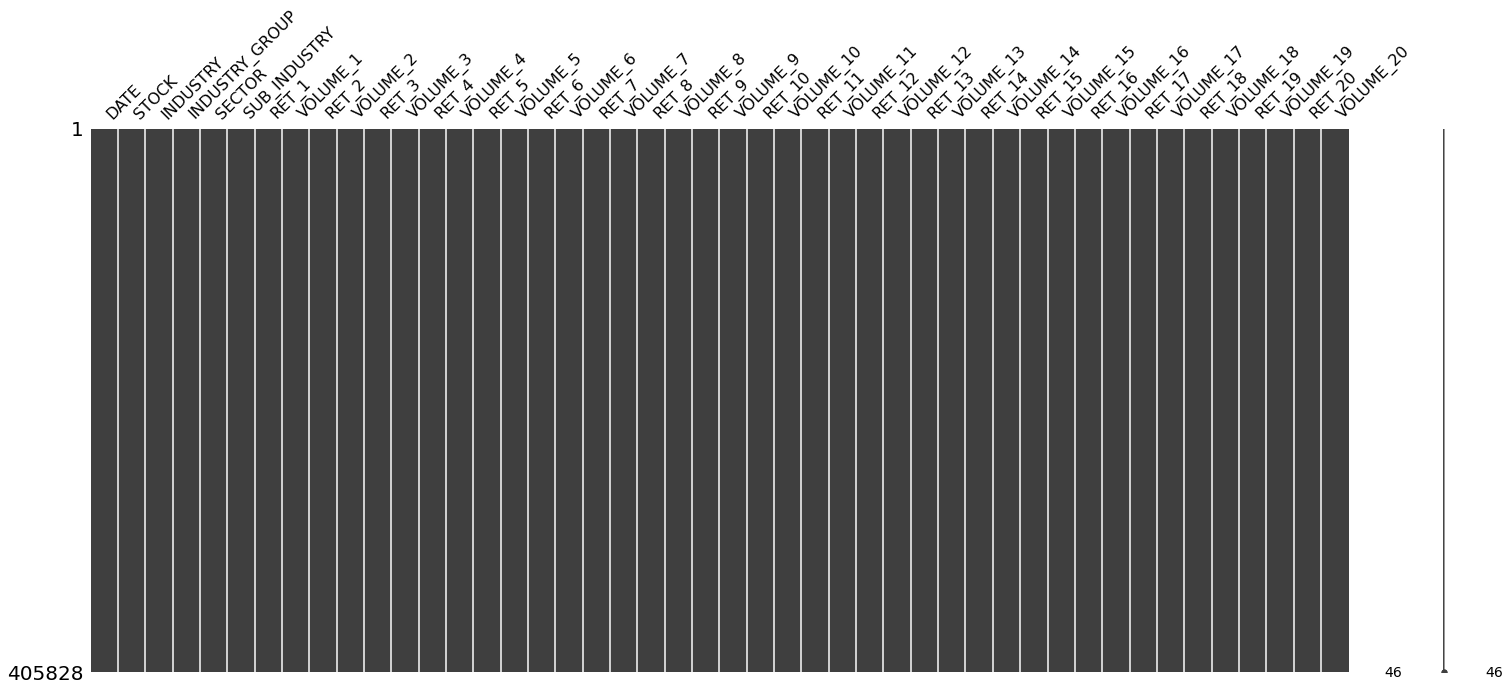

In [31]:
msno.matrix(x) 

### DATASET HAS TOTAL 12 DIFFERENT SECTORS(EX: Pharma, IT, etc)

* to fill the missing values of volume, we first group the entire dataset with respect to the sectors.
* then find mean values for each day for every sector.

In [32]:
list=['SECTOR','RET_1', 'VOLUME_1', 'RET_2', 'VOLUME_2', 'RET_3', 'VOLUME_3', 'RET_4',
       'VOLUME_4', 'RET_5', 'VOLUME_5', 'RET_6', 'VOLUME_6', 'RET_7',
       'VOLUME_7', 'RET_8', 'VOLUME_8', 'RET_9', 'VOLUME_9', 'RET_10',
       'VOLUME_10', 'RET_11', 'VOLUME_11', 'RET_12', 'VOLUME_12', 'RET_13',
       'VOLUME_13', 'RET_14', 'VOLUME_14', 'RET_15', 'VOLUME_15', 'RET_16',
       'VOLUME_16', 'RET_17', 'VOLUME_17', 'RET_18', 'VOLUME_18', 'RET_19',
       'VOLUME_19', 'RET_20', 'VOLUME_20']

sector=pd.DataFrame()

for i in list:
    sector[i]=x[i]

sector=sector.groupby(['SECTOR']).mean()
sector
#print(sector)
#x.columns

,RET_1,VOLUME_1,RET_2,VOLUME_2,RET_3,VOLUME_3,RET_4,VOLUME_4,RET_5,VOLUME_5,...,RET_16,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20
SECTOR,,,,,,,,,,,,,,,,,,,,,
0,0.001026,-0.097384,0.001010,-0.072369,0.001651,-0.067180,-0.001632,-0.009803,-0.000157,-0.048156,...,0.001006,-0.004781,0.002876,-0.040701,0.000125,-0.084328,-0.002538,-0.063447,-0.000755,-0.077558
1,0.002025,-0.146943,0.000929,-0.156239,0.000656,-0.156259,-0.004755,-0.145388,0.000670,-0.143864,...,0.000245,-0.161189,0.002835,-0.183728,0.002704,-0.158128,-0.002255,-0.151738,0.000920,-0.119921
2,0.001376,-0.145567,0.001563,-0.158306,0.002349,-0.156082,-0.001839,-0.130857,0.000322,-0.146628,...,0.000964,-0.130576,0.001448,-0.132275,0.001709,-0.107988,-0.001334,-0.128126,0.000279,-0.147581
3,0.001386,-0.128889,0.001484,-0.138350,0.001904,-0.149761,-0.000859,-0.143154,0.000219,-0.151459,...,0.001125,-0.125357,0.001441,-0.121705,0.000952,-0.120505,-0.001112,-0.122337,-0.000273,-0.108585
4,0.000794,-0.116871,0.001472,-0.116394,0.001814,-0.124365,-0.001422,-0.114242,-0.000102,-0.113825,...,0.001118,-0.116348,0.001556,-0.116316,0.000998,-0.102308,-0.000756,-0.096452,-0.000153,-0.108285
5,0.000927,-0.067211,0.000857,-0.099815,0.001569,-0.113405,-0.000679,-0.090750,0.000390,-0.088972,...,0.000824,-0.103114,0.000806,-0.117263,0.000830,-0.100048,-0.000554,-0.082906,0.000456,-0.106023
6,0.001582,-0.038687,0.000463,-0.032465,0.002918,-0.048462,-0.000971,-0.070322,0.000444,-0.053889,...,0.000644,-0.045324,0.001036,-0.061383,0.001048,-0.044805,-0.000699,-0.049410,0.000874,-0.060105
7,0.001242,-0.077518,0.001026,-0.082036,0.002693,-0.126473,-0.000150,-0.129009,-0.000006,-0.148293,...,0.001546,-0.100795,0.001364,-0.097245,0.000946,-0.114057,-0.000568,-0.116713,-0.000690,-0.094264
8,0.002368,-0.106504,0.000865,-0.110039,0.001890,-0.130523,0.000633,-0.115032,0.000896,-0.112086,...,0.000651,-0.101830,0.002057,-0.124254,0.000474,-0.101323,-0.001207,-0.101384,-0.000490,-0.121052


###  HOW RETURN VARIES FOR 20 DAYS FOR EACH SECTOR

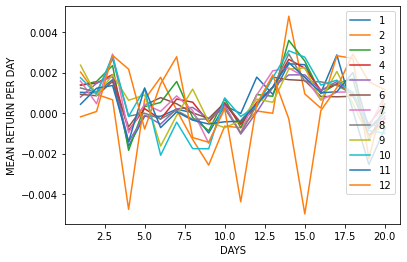

In [33]:
# MEAN RETURN OF EACH SECTOR
list= ['RET_%d' % (i + 1) for i in range(20)]
s1=np.zeros(20)
for i in range(20):
    s1[i]=sector[list[i]][0]
xa=np.arange(1,21)
s2=np.zeros(20)
for i in range(20):
    s2[i]=sector[list[i]][1]
xa=np.arange(1,21)
s=np.zeros(20)
for m in range(12):
    for i in range(20):
        s[i]=sector[list[i]][m]
    plt.plot(xa,s)
plt.plot(figsize=(10,20))
plt.xlabel('DAYS')
plt.ylabel('MEAN RETURN PER DAY')
plt.legend(xa)
plt.show()

###  HOW VOLUME VARIES FOR 20 DAYS FOR EACH SECTOR

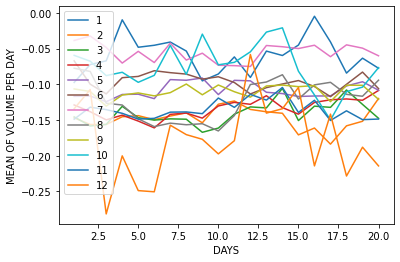

In [34]:
# MEAN RETURN OF EACH SECTOR
list= ['VOLUME_%d' % (i + 1) for i in range(20)]
s1=np.zeros(20)
for i in range(20):
    s1[i]=sector[list[i]][0]
s2=np.zeros(20)
for i in range(20):
    s2[i]=sector[list[i]][1]
s=np.zeros(20)
for m in range(12):
    for i in range(20):
        s[i]=sector[list[i]][m]
    plt.plot(xa,s)
plt.plot(figsize=(10,20))
plt.xlabel('DAYS')
plt.ylabel('MEAN OF VOLUME PER DAY')
plt.legend(xa)
plt.show()

* WE CAN SEE THAT FOR EACH SECTOR THE VALUE CHANGES FOR VOLUME AND THEY ARE NOT UNIFORM.
* HENCE FILLING THE NULL VALUES WITH CORRESPONDING SECTOR WOULD GIVE APPROPRIATE RESULTS.

### we fill the NULL values of all VOLUME attributes with the mean values conditional to the sector.
### (METHOD 2)

In [9]:
vol_col= ['VOLUME_1', 'VOLUME_2', 'VOLUME_3',
       'VOLUME_4', 'VOLUME_5', 'VOLUME_6', 
       'VOLUME_7',  'VOLUME_8',  'VOLUME_9', 
       'VOLUME_10',  'VOLUME_11',  'VOLUME_12',
       'VOLUME_13',  'VOLUME_14',  'VOLUME_15', 
       'VOLUME_16', 'VOLUME_17', 'VOLUME_18',
       'VOLUME_19',  'VOLUME_20']


for m in range(20):
    for n in range(x.shape[0]):
        if(np.isnan(x[vol_col[m]][n])):
            s=x['SECTOR'][m]
            x[vol_col[m]][n]=sector[vol_col[m]][s]
    print(m)

<ipython-input-9-21af7570a41f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[vol_col[m]][n]=sector[vol_col[m]][s]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


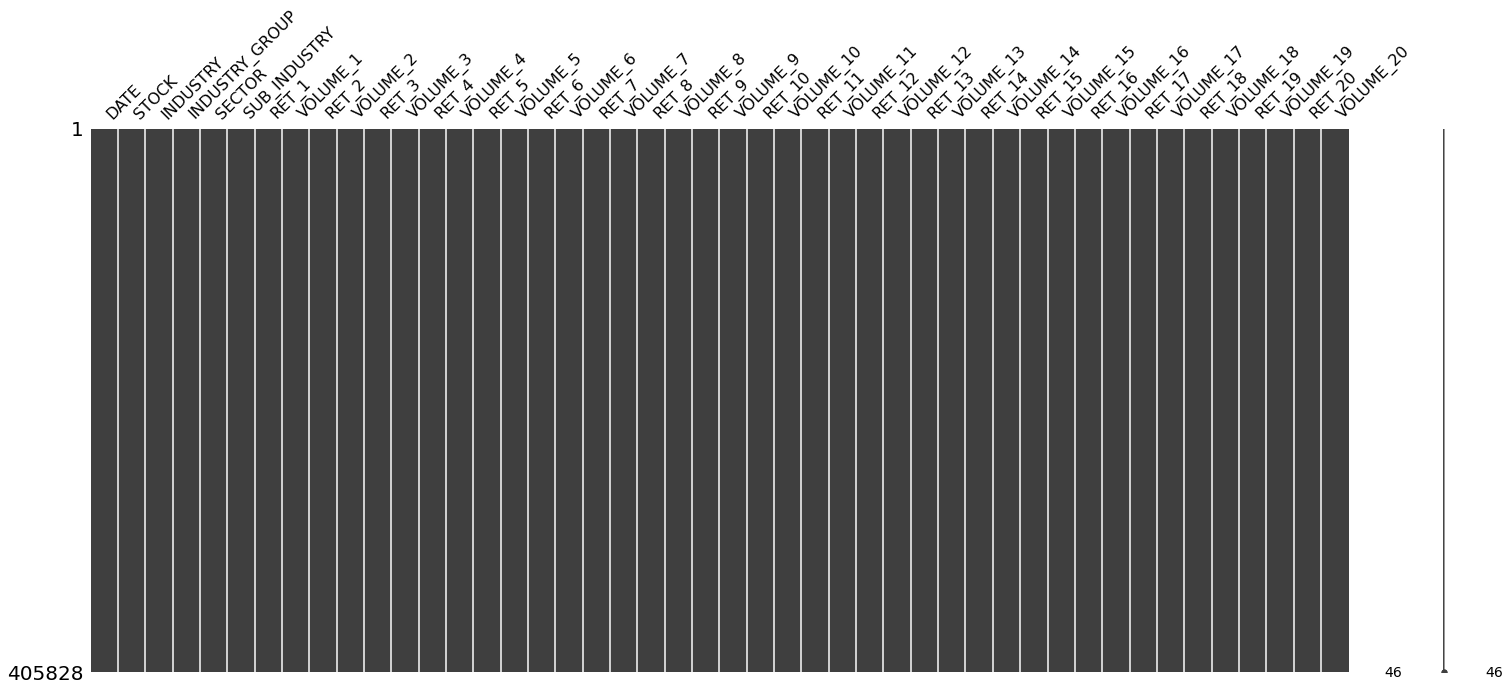

In [35]:
msno.matrix(x) 

## ATTRIBUTE SELECTION / FEATURE ENGINEERING

The main drawback in this challenge would be to deal with the noise. To do that, we could create some feature that aggregate features with some statistics.

The following cell computes statistics on a given target conditionally to some features. For example, we want to generate a feature that describe the mean of RET_1 conditionally to the SECTOR and the DATE.

In [36]:
# Feature engineering
new_features = []

# Conditional aggregated features
shifts = [1]  # Choose some different shifts
statistics = ['mean']  # the type of stat
gb_features = ['SECTOR', 'DATE']
target_feature = 'RET'
tmp_name = '_'.join(gb_features)
for shift in shifts:
    for stat in statistics:
        name = f'{target_feature}_{shift}_{tmp_name}_{stat}'
        feat = f'{target_feature}_{shift}'
        new_features.append(name)
        for data in [train, test]:
            data[name] = data.groupby(gb_features)[feat].transform(stat)

## Feature selection
To reduce the number of feature (and the noise) we only consider the 5 last days of RET and VOLUME in addition to the newly created feature.

In [37]:
target = 'RET'

n_shifts = 5  # If you don't want all the shifts to reduce noise
features = ['RET_%d' % (i + 1) for i in range(n_shifts)]
features += ['VOLUME_%d' % (i + 1) for i in range(n_shifts)]
features += new_features  # The conditional features
train[features].head()

,RET_1,RET_2,RET_3,RET_4,RET_5,VOLUME_1,VOLUME_2,VOLUME_3,VOLUME_4,VOLUME_5,RET_1_SECTOR_DATE_mean
ID,,,,,,,,,,,
0,-0.015748,-0.015504,0.010972,-0.014672,0.016483,0.147931,0.179183,0.033832,-0.362868,-0.972920,0.009178
1,0.003984,-0.090580,0.018826,-0.025540,-0.038062,NaN,NaN,NaN,NaN,NaN,0.006477
2,0.000440,-0.058896,-0.009042,0.024852,0.009354,-0.096282,0.084771,-0.298777,-0.157421,0.091455,0.013449
3,0.031298,0.007756,-0.004632,-0.019677,0.003544,-0.429540,-0.089919,-0.639737,-0.940163,-0.882464,0.017253
4,0.027273,-0.039302,0.000000,0.000000,0.022321,-0.847155,-0.943033,-1.180629,-1.313896,-1.204398,0.006241


## Model and local score
A Random Forest (RF) model is chosen. We consider a large number of tree with a quiet small depth. A KFold is done on the dates (using DATE) for a local scoring of the model.

In [38]:
X_train = train[features]
y_train = train[target]

In [39]:
# A quiet large number of trees with low depth to prevent overfits
rf_params = {
    'n_estimators':500,
    'max_depth': 2**3,
    'random_state': 0,
    'n_jobs': -1,
    'max_features':0.4,
    'min_samples_leaf': 60
    
    
}

train_dates = train['DATE'].unique()
test_dates = test['DATE'].unique()

n_splits = 4
scores = []
models = []

splits = KFold(n_splits=n_splits, random_state=0,
               shuffle=True).split(train_dates)

for i, (local_train_dates_ids, local_test_dates_ids) in enumerate(splits):
    local_train_dates = train_dates[local_train_dates_ids]
    local_test_dates = train_dates[local_test_dates_ids]

    local_train_ids = train['DATE'].isin(local_train_dates)
    local_test_ids = train['DATE'].isin(local_test_dates)

    X_local_train = X_train.loc[local_train_ids]
    y_local_train = y_train.loc[local_train_ids]
    X_local_test = X_train.loc[local_test_ids]
    y_local_test = y_train.loc[local_test_ids]

    X_local_train = X_local_train.fillna(0)
    X_local_test = X_local_test.fillna(0)

    model = RandomForestClassifier(**rf_params)
    model.fit(X_local_train, y_local_train)

    y_local_pred = model.predict_proba(X_local_test)[:, 1]
    
    sub = train.loc[local_test_ids].copy()
    sub['pred'] = y_local_pred
    y_local_pred = sub.groupby('DATE')['pred'].transform(lambda x: x > x.median()).values

    models.append(model)
    score = accuracy_score(y_local_test, y_local_pred)
    scores.append(score)
    print(f"Fold {i+1} - Accuracy: {score* 100:.2f}%")

mean = np.mean(scores)*100
std = np.std(scores)*100
u = (mean + std)
l = (mean - std)
print(f'Accuracy: {mean:.2f}% [{l:.2f} ; {u:.2f}] (+- {std:.2f})')

Fold 1 - Accuracy: 51.66%
Fold 2 - Accuracy: 50.65%
Fold 3 - Accuracy: 51.11%
Fold 4 - Accuracy: 52.07%
Accuracy: 51.37% [50.83 ; 51.91] (+- 0.54)


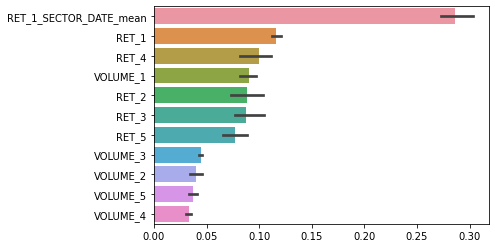

In [40]:
feature_importances = pd.DataFrame([model.feature_importances_ for model in models], columns=features)

sns.barplot(data=feature_importances, orient='h', order=feature_importances.mean().sort_values(ascending=False).index)

In [41]:
X_test = test[features]

rf_params['random_state'] = 0
model = RandomForestClassifier(**rf_params)
model.fit(X_train.fillna(0), y_train)
y_pred = model.predict_proba(X_test.fillna(0))[:, 1]

sub = test.copy()
sub['pred'] = y_pred
y_pred = sub.groupby('DATE')['pred'].transform(
    lambda x: x > x.median()).values

submission = pd.Series(y_pred)
submission.index = test.index
submission.name = target

submission.to_csv('./benchmark_qrt.csv', index=True, header=True)